First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

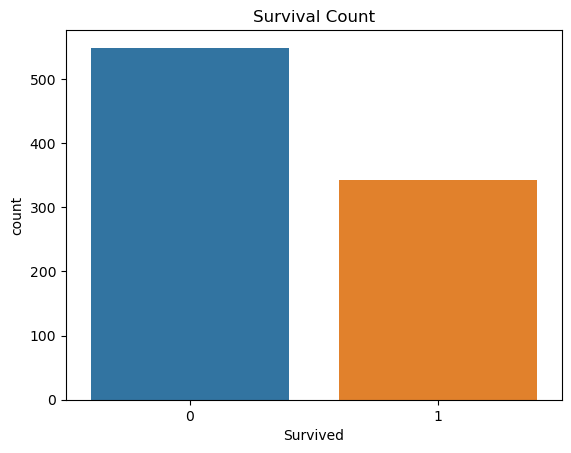

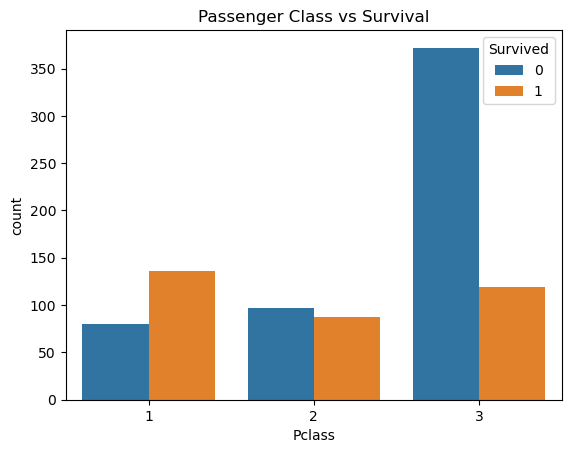

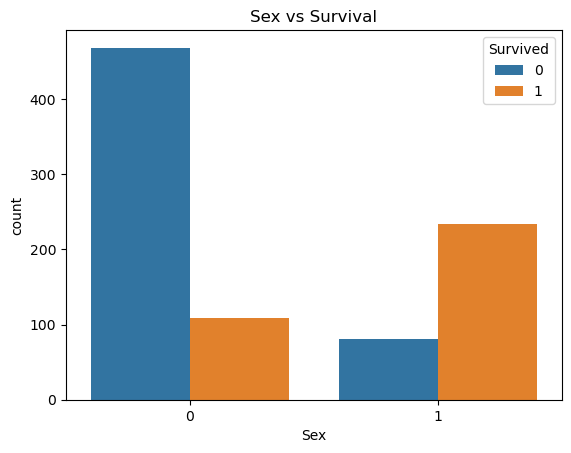


Logistic Regression Model Evaluation:
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7988826815642458

Best Parameters and Score for Decision Tree Classifier:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.7948980596867921

Model Comparison Results:

Random Forest Results:
[[93 12]
 [18 56]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.832402

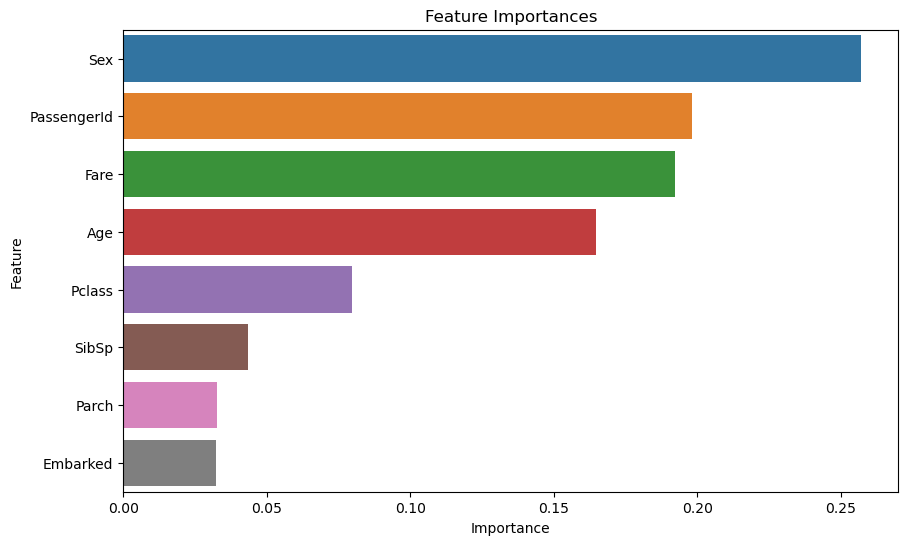

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(titanic_data.head())

# Display dataset information
print("\nDataset Information:")
print(titanic_data.info())

# Display basic statistics
print("\nBasic Statistics:")
print(titanic_data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(titanic_data.isnull().sum())

# Data preprocessing
# Fill missing Age values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column due to many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Drop the Name and Ticket columns as they are not useful for prediction
titanic_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical columns to numerical
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Display dataset information after preprocessing
print("\nDataset Information after preprocessing:")
print(titanic_data.info())

# Exploratory Data Analysis (EDA)
# Visualize the distribution of survived passengers
sns.countplot(data=titanic_data, x='Survived')
plt.title('Survival Count')
plt.show()

# Visualize the distribution of passengers by class and survival
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title('Passenger Class vs Survival')
plt.show()

# Visualize the distribution of passengers by sex and survival
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Sex vs Survival')
plt.show()

# Split the data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')

# Hyperparameter tuning for Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("\nBest Parameters and Score for Decision Tree Classifier:")
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Model comparison
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC()
dt_classifier_best = DecisionTreeClassifier(**best_params, random_state=42)

classifiers = {
    'Random Forest': rf_classifier,
    'SVM': svm_classifier,
    'Decision Tree': dt_classifier_best
}

print("\nModel Comparison Results:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'\n{name} Results:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {acc}')

# Final Model and Interpretation
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
acc_final = accuracy_score(y_test, y_pred_final)

print("\nFinal Model (Random Forest Classifier) Evaluation:")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print(f'Accuracy: {acc_final}')

# Feature importance analysis
feature_importances = final_model.feature_importances_
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()
